In [16]:
import random as rnd

class GeneticAlgorithms:
    def geneticAlgorithm(problem, population, fitnessFunction, mutationProbability=0.01, iterations=100):
        iteration = 0
        while True:
            iteration += 1

            newPopulation = []
            for i in range(0, len(population)):
                x = GeneticAlgorithms.randomSelection(population, fitnessFunction)
                y = GeneticAlgorithms.randomSelection(population, fitnessFunction)

                child = problem.reproduce(x, y)
                if rnd.random() < mutationProbability:
                    child = GeneticAlgorithms.mutate(child)

                # newPopulationLength = len(newPopulation)
                newPopulation.append(child)
                # newPopulation = np.reshape(newPopulation, (newPopulationLength+1, len(child)))

            population = newPopulation

            if iteration > iterations:
                break

        bestChild = GeneticAlgorithms.bestSelection(population, fitnessFunction)
        problem.printState(bestChild, 'Genetic Algorithm')
        # return bestChild

    def randomSelection(population: list, fitnessFunction):
        rnd.shuffle(population)  # Shuffle population

        chance = rnd.randint(0, sum([fitnessFunction(element) for element in population]))
        for element in population:
            chance -= fitnessFunction(element)
            if chance <= 0:
                return element

    def mutate(child):
        mutatedChild = child.copy()
        childLength = len(child)

        # Swap two random elements
        i = rnd.randint(0, childLength - 1)
        j = rnd.randint(0, childLength - 1)
        while i == j:
            j = rnd.randint(0, childLength - 1)

        mutatedChild[i], mutatedChild[j] = mutatedChild[j], mutatedChild[i]

        return mutatedChild

    def bestSelection(population: list, fitnessFunction):
        rnd.shuffle(population)  # Shuffle population
        return max(population, key=fitnessFunction)


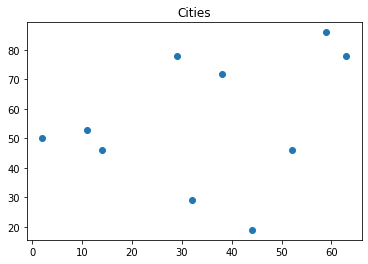

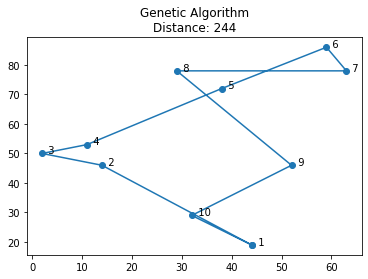

In [17]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(10)
GeneticAlgorithms.geneticAlgorithm(ts, ts.population(), ts.fitnessFunction)


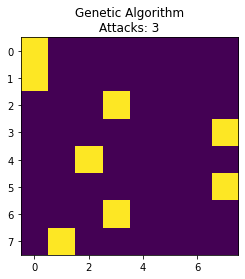

In [15]:
from NQueens import NQueens
nq = NQueens(8)
GeneticAlgorithms.geneticAlgorithm(nq, nq.population(), nq.fitnessFunction)
